In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_train = pd.read_csv('fin_users_train.csv')

In [4]:
df_train.head()

,Unnamed: 0,target
0,FjolnirFimbulvetr,0
1,Kazehaya,0
2,ClawedGiroux,0
3,MrKixs,0
4,icancubutucantcme,0


In [5]:
df_train = df_train.set_index('Unnamed: 0')

In [6]:
df_test = pd.read_csv('fin_users_test.csv')

In [7]:
df_test.head()

,Unnamed: 0,target
0,jcwinny,0
1,lazigrdnr,0
2,Boomslangalang,0
3,bczeon27,1
4,madosooki,1


In [8]:
df_test = df_test.set_index('Unnamed: 0')

In [9]:
df_train.head()

,target
Unnamed: 0,
FjolnirFimbulvetr,0
Kazehaya,0
ClawedGiroux,0
MrKixs,0
icancubutucantcme,0


In [10]:
df_nlp = pd.read_csv('fin_cleaned_nlp.csv')

In [11]:
df_nlp.head()

,Unnamed: 0,Text,Clean
0,PDXorax,"The Lump of Labor doesn't apply in this case, ...",lump labor doesnt appli case look rd labor aut...
1,PrincePizza1,"I think things ""getting better"" to people like...",think thing get better peopl like everybodi ag...
2,Marmar79,Thank you. This made my dayHe so edgy.\n\nEdit...,thank made dayh edgi edit dont think wrong thi...
3,IRISHE3,I just wish politicians would put the money sh...,wish politician would put money shit real doll...
4,RonZiggy,Climate change as well.Wow...just wowWhat is t...,climat chang wellwowjust wowwhat fromwel happe...


In [12]:
df_nlp.set_index('Unnamed: 0',inplace=True)

In [14]:
df_train.shape

(2487, 1)

In [15]:
df_test.shape

(830, 1)

In [16]:
df_train = pd.merge(df_train,df_nlp,how='left',on='Unnamed: 0')
df_train['predicted_target']=df_train['target']
df_train.drop(labels=['Text','target'],axis=1,inplace=True)

In [17]:
df_test = pd.merge(df_test,df_nlp,how='left',on='Unnamed: 0')
df_test['predicted_target']=df_test['target']
df_test.drop(labels=['Text','target'],axis=1,inplace=True)

In [18]:
df_train.dropna(axis=0,inplace=True)

In [19]:
df_test.dropna(axis=0,inplace=True)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [21]:
for n_grams in [(1,1),(1,2),(1,3)]:
    for features in [100,500,1000]:
        #initialize TF-IDF vectorizer
        tf = TfidfVectorizer(ngram_range = n_grams,max_features=features)
        #Generate sparse matrixes and combine with previous features
        sparseXtrain = tf.fit_transform(df_train['Clean'])
        sparseXtrain_df= pd.DataFrame(sparseXtrain.toarray(),
               columns=tf.get_feature_names(),index=df_train.index)
        df_train2 = pd.concat([df_train.drop('Clean',axis=1),sparseXtrain_df],axis=1,join='inner')

        sparseXtest = tf.transform(df_test['Clean'])
        sparseXtest_df= pd.DataFrame(sparseXtest.toarray(),
               columns=tf.get_feature_names(),index=df_test.index)
        df_test2 = pd.concat([df_test.drop('Clean',axis=1),sparseXtest_df],axis=1,join='inner')

        #Create X_Train/y_train
        X_train = df_train2.drop('predicted_target',axis=1)
        X_test = df_test2.drop('predicted_target',axis=1)
        y_train = df_train2['predicted_target']
        y_test = df_test2['predicted_target']

        #Run logisitic Regression
        lr = LogisticRegression(solver='lbfgs')
        lr.fit(X_train,y_train)
        print('Scores For: ',n_grams,features)
        print(lr.score(X_train,y_train))
        print(lr.score(X_test,y_test))

Scores For:  (1, 1) 100
0.7907859078590785
0.7679738562091504
Scores For:  (1, 1) 500
0.8520325203252033
0.8137254901960784
Scores For:  (1, 1) 1000
0.8655826558265582
0.8186274509803921
Scores For:  (1, 2) 100
0.7907859078590785
0.7679738562091504
Scores For:  (1, 2) 500
0.8525745257452575
0.8137254901960784
Scores For:  (1, 2) 1000
0.8661246612466125
0.8202614379084967
Scores For:  (1, 3) 100
0.7907859078590785
0.7679738562091504
Scores For:  (1, 3) 500
0.8525745257452575
0.8137254901960784
Scores For:  (1, 3) 1000
0.8661246612466125
0.8202614379084967


In [22]:
for n_grams in [(1,1),(1,2)]:
    for features in [100,500,1000]:
        #initialize Count Vectorizer
        cv = CountVectorizer(ngram_range = n_grams,max_features=features)
        #Generate sparse matrixes and combine with previous features
        sparseXtrain = cv.fit_transform(df_train['Clean'])
        sparseXtrain_df= pd.DataFrame(sparseXtrain.toarray(),
               columns=cv.get_feature_names(),index=df_train.index)
        df_train2 = pd.concat([df_train.drop('Clean',axis=1),sparseXtrain_df],axis=1,join='inner')

        sparseXtest = cv.transform(df_test['Clean'])
        sparseXtest_df= pd.DataFrame(sparseXtest.toarray(),
               columns=cv.get_feature_names(),index=df_test.index)
        df_test2 = pd.concat([df_test.drop('Clean',axis=1),sparseXtest_df],axis=1,join='inner')

        #Create X_Train/y_train
        X_train = df_train2.drop('predicted_target',axis=1)
        X_test = df_test2.drop('predicted_target',axis=1)
        y_train = df_train2['predicted_target']
        y_test = df_test2['predicted_target']

        #Run logisitic Regression
        lr = LogisticRegression(solver='lbfgs')
        lr.fit(X_train,y_train)
        print(lr.score(X_test,y_test),"variables: ",n_grams,features)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7679738562091504 variables:  (1, 1) 100


/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7401960784313726 variables:  (1, 1) 500


/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7696078431372549 variables:  (1, 1) 1000


/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7679738562091504 variables:  (1, 2) 100


/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7418300653594772 variables:  (1, 2) 500
0.7728758169934641 variables:  (1, 2) 1000


/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [23]:
tf = TfidfVectorizer(ngram_range = (1,2),max_features=1000)
        
#Generate sparse matrixes and combine with previous features
sparseXtrain = tf.fit_transform(df_train['Clean'])
sparseXtrain_df= pd.DataFrame(sparseXtrain.toarray(),
       columns=tf.get_feature_names(),index=df_train.index)
df_train2 = pd.concat([df_train.drop('Clean',axis=1),sparseXtrain_df],axis=1,join='inner')

sparseXtest = tf.transform(df_test['Clean'])
sparseXtest_df= pd.DataFrame(sparseXtest.toarray(),
       columns=tf.get_feature_names(),index=df_test.index)
df_test2 = pd.concat([df_test.drop('Clean',axis=1),sparseXtest_df],axis=1,join='inner')

#Create X_Train/y_train
X_train = df_train2.drop('predicted_target',axis=1)
X_test = df_test2.drop('predicted_target',axis=1)
y_train = df_train2['predicted_target']
y_test = df_test2['predicted_target']

#Run logisitic Regression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)
print('Scores For: (1,2) & 1000 features')
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

Scores For: (1,2) & 1000 features
0.8661246612466125
0.8202614379084967


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,lr.predict(X_test))

array([[451,  14],
       [ 96,  51]])

In [26]:
y_test.value_counts()

0    465
1    147
Name: predicted_target, dtype: int64

In [27]:
y_test.value_counts(normalize=True)

0    0.759804
1    0.240196
Name: predicted_target, dtype: float64

In [28]:
pred_proba = [i[1] for i in lr.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

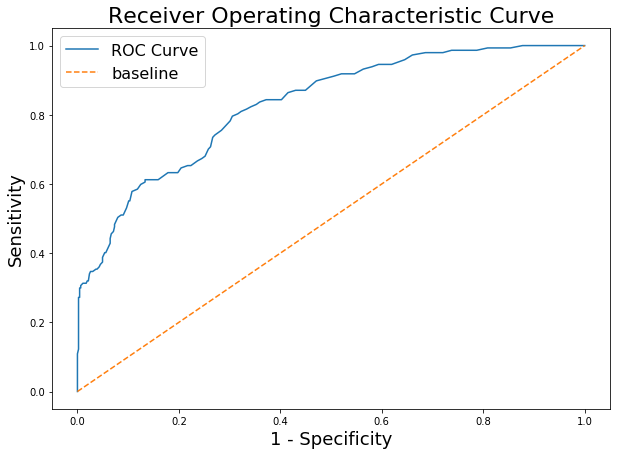

In [29]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [31]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.8279277302318777

In [61]:
# pd.DataFrame(lr.coef_.T,X_train.columns).sort_values(by=0,ascending=False)

In [32]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [33]:
smt = SMOTE()

In [34]:
X_train_bal,y_train_bal = smt.fit_sample(X_train,y_train)

In [35]:
lrsmt = LogisticRegression()

In [48]:
#Did a couple run throughs to tune parameters, what's shown is the most recent run through
params = {
    'C':[25,50,100,200,500,1000]
}
gsLR = GridSearchCV(lrsmt, param_grid=params, cv=5,verbose=1,n_jobs=2)
gsLR.fit(X_train_bal, y_train_bal)
print(gsLR.best_score_)
gsLR.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    4.0s finished
/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8808160343593414


{'C': 50}

In [49]:
gsLR.score(X_test,y_test)

0.7434640522875817

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
mb = MultinomialNB()

In [70]:
#Did a couple run throughs to tune parameters, what's shown is the most recent run through
params = {
    'alpha':[x/100 for x in range(5,20)]
}
gsMB = GridSearchCV(mb, param_grid=params, cv=5,verbose=1,n_jobs=2)
gsMB.fit(X_train_bal, y_train_bal)
print(gsLR.best_score_)
gsMB.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.8808160343593414


[Parallel(n_jobs=2)]: Done  72 out of  75 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    1.1s finished


{'alpha': 0.14}

In [71]:
gsMB.score(X_test,y_test)

0.7745098039215687

In [78]:
lrsmt.fit(X_train_bal,y_train_bal)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
lrsmt.score(X_train_bal,y_train_bal)

0.8872584108804581

In [80]:
lrsmt.score(X_test,y_test)

0.7581699346405228

In [82]:
confusion_matrix(y_test,lrsmt.predict(X_test))

array([[362, 103],
       [ 45, 102]])

In [83]:
pred_proba = [i[1] for i in lrsmt.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

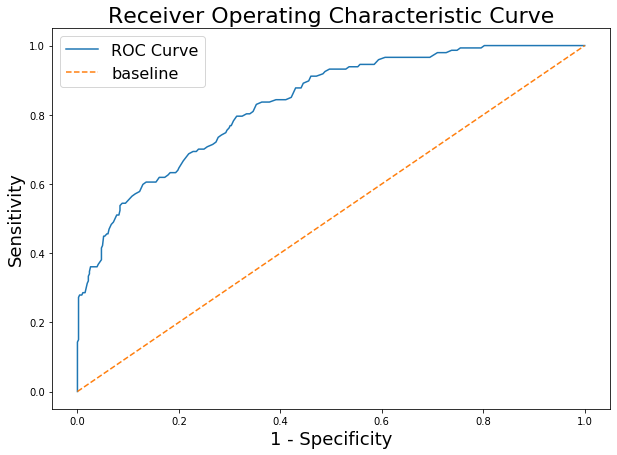

In [84]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# plt.axhline(y=.72, color='k', linestyle='--')
# plt.axvline(x=.18, color='k', linestyle='--')


# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)


# Create legend.
plt.legend(fontsize=16);

In [43]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.8326969497476411

In [45]:
pd.DataFrame(lrsmt.coef_.T,X_train.columns).sort_values(by=0,ascending=False)

,0
ubi,6.401909
autom,3.549513
welfar,2.717893
debat,2.459271
solut,2.332459
job,2.258435
current,1.983379
freedom,1.951683
program,1.835658
qualifi,1.724858
